In [144]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import scipy
from scipy.io import loadmat
import sys

from sklearn.cluster import KMeans

import matplotlib.animation as animation

from evo_strat import evo_strat
from simulator import simulator, gen_vornoi_classes, gen_wafer_locs

In [129]:
sp = 'C:\\Users\\roberttk\\Desktop\\SLAC_RA\\RL_AdaptiveIllumination\\RL_AI_code\\spectra'
sl = list(Path(sp).glob('*.mat'))

x1 = loadmat(sl[0])
data = x1['Fe_normMaster1']

x2 = loadmat(sl[1])
data2 = x2['Fe_XANES2']
print(np.shape(data))

(230, 118)


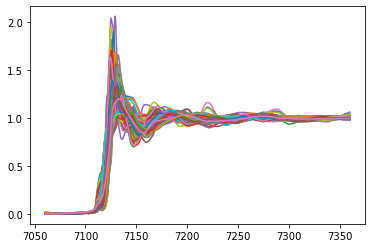

In [143]:
fix, ax = plt.subplots()
for i in range(1,118):
    ax.plot(data[:, 0], data[:, i])

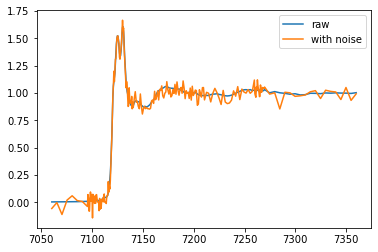

In [131]:
i = 40
fig, ax = plt.subplots()

noise = np.random.normal(size=len(data[:,i]))
noised = data[:,i] + noise*0.05

ax.plot(data[:, 0], data[:,i], label='raw')
ax.plot(data[:, 0], noised, label='with noise')
ax.legend()

In [132]:
###
# 1. LOAD DATA
# Put the X, Y positions and the classes into a dataframe 
###

x, y = gen_wafer_locs(radius=20)
locdf = pd.DataFrame({'X': x, 'Y': y})

locdf['class'] = gen_vornoi_classes(locdf['X'], locdf['Y'], 5)[0]

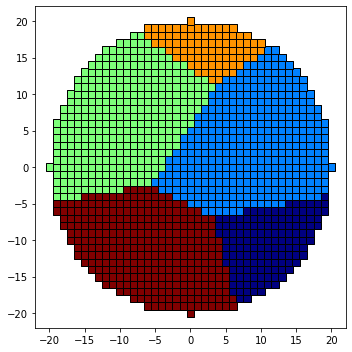

In [133]:
###
# 1.5 Preview data
###

fig = plt.figure(figsize=(5,5))
fig.set_tight_layout(True)
plt.scatter(locdf['X'], locdf['Y'], c=locdf['class'], 
                    cmap=cm.jet, marker='s', edgecolors='k', s=60)

In [135]:
locdf['data'] = ''
numClasses = locdf['class'].max() - locdf['class'].min() + 1
# sample without replacement to choose spectra to use
classes = np.random.choice(np.arange(118), size=int(numClasses), replace=False)

for i in range(len(locdf)):
    # generate normal noise with shape of data
    noise = np.random.normal(size=len(data[:,1]))

    # grab corresponding class
    specNo = classes[int(locdf['class'][i])]

    # Add noise with magnitude 0.05 to the chosen class
    noised = data[:,specNo] + noise*0.05
    locdf['data'][i] = np.array([data[:,0], noised])

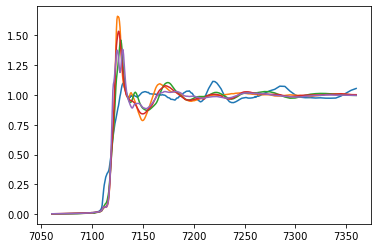

In [138]:
fig, ax = plt.subplots()
for x in classes:
    ax.plot(data[:,0], data[:,x])

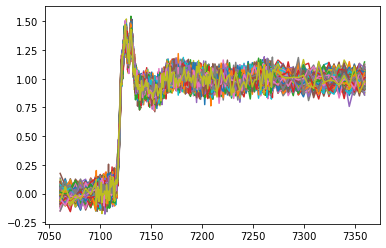

In [142]:
fig, ax = plt.subplots()
for x in locdf[locdf['class']==4]['data']:
    ax.plot(x[0], x[1])

In [157]:
# Probably need to align spectra by energy before fitting.  Need to grab 1D array per datapoint
X = []
for dat in locdf['data'].values:
    X.append(dat[1])

In [193]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
locdf['learned clusters'] = kmeans.labels_

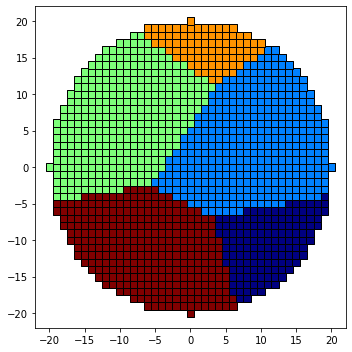

In [202]:
fig = plt.figure(figsize=(5,5))
fig.set_tight_layout(True)
plt.scatter(locdf['X'], locdf['Y'], c=locdf['class'], 
                    cmap=cm.jet, marker='s', edgecolors='k', s=60)

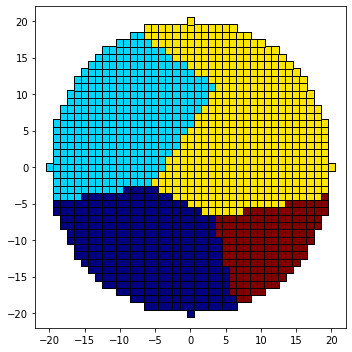

In [203]:
fig = plt.figure(figsize=(5,5))
fig.set_tight_layout(True)
plt.scatter(locdf['X'], locdf['Y'], c=locdf['learned clusters'], 
                    cmap=cm.jet, marker='s', edgecolors='k', s=60)